In [19]:
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np
import seaborn as sns
import matplotlib.mlab as mlab
import statistics as st
import re
from sklearn import linear_model
pd.options.mode.chained_assignment = None  # default='warn'
df = pd.read_csv("E:/college/IDS/mini-project/dataset/fifa_ranking1.csv")

In [20]:
# print(df)
df.drop(["rank_change"], inplace=True, axis = 1)

In [21]:
# NaN for categorical
# NaN for numeric

last_year_avg = np.random.normal(df["last_year_avg"])
lyamean = np.mean(last_year_avg)
lyamedian = np.median(last_year_avg)
print("mean:", lyamean)
print("median:", lyamedian)
# for index, row in df['confederation'].iteritems():
#     if(row == 'NaN'):
#         df['confederation'].loc[index] = df['confederation'].loc[index-1]
#     else:
#         pass
# print(type(lyamedian))
# for index, row in df['last_year_avg'].iteritems():
#     if(row == 0.0):
#         df['last_year_avg'].loc[index] = lyamedian
#     else:
#         pass

mean: 202.539883464
median: 157.147352486


In [22]:
# interpolation of data

for index, row in df['total_points'].iteritems():
    if(row == 0.0 ):
        df['total_points'].loc[index] = (df['total_points'].loc[index-1] + df['total_points'].loc[index+1]) / 2
    else:
        pass

In [23]:
country_abrv = []
total_points = []
for index, value in df["country_abrv"][:9].items():
    country_abrv.append(value)
# print(country_abrv)
for index, value in df["total_points"][:9].items():
    total_points.append(value)

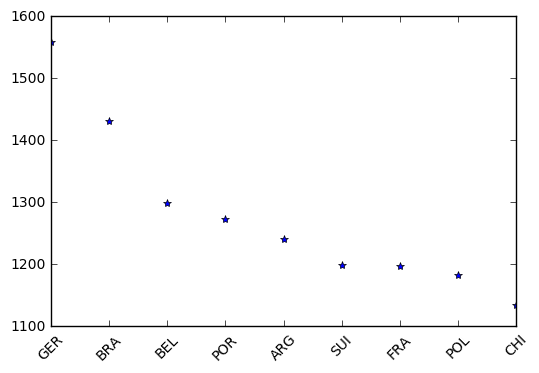

In [24]:
abrv = []
for i in range(1, 10):
    abrv.append(i)
plt.xticks(abrv, country_abrv)
plt.xticks(range(1, 10), country_abrv, rotation = 45)
plt.plot(abrv, total_points, "*")
plt.show()

In [25]:
# df['next_year_avg'] = 0

In [26]:
# To DELETE
# for index, row in df[:2].iterrows():
#     y_bar = (row['cur_year_avg'] + row['last_year_avg'] + row['two_year_ago_avg'] + row['three_year_ago_avg']) / 4
#     print(y_bar)
#     x_bar = 2016.5
#     m = (((2018 - x_bar) * (row['cur_year_avg'] - y_bar)) + ((2017 - x_bar) * (row['last_year_avg'] - y_bar)) + ((2016 - x_bar) * (row['two_year_ago_avg'] - y_bar)) + ((2015 - x_bar) * (row['three_year_ago_avg'] - y_bar))) / (((2018-x_bar)**2) + ((2017-x_bar)**2) + ((2016-x_bar)**2) + ((2016-x_bar)**2))
#     m = abs(m)
#     var = 2019 * m
#     df['next_year_avg'].loc[index] = var
# print(df['next_year_avg'])

In [27]:
totpts_mean = df['total_points'].mean()
totpts_std = df['total_points'].std()
totpts_norm = (df['total_points'] - totpts_mean) / (totpts_std)

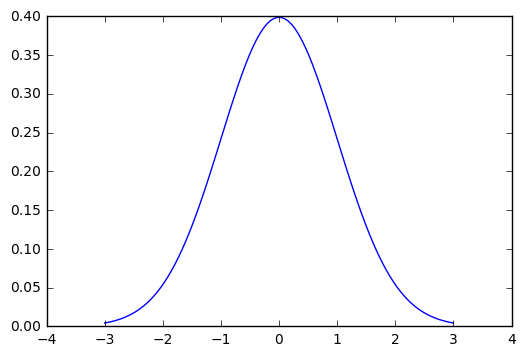

In [28]:
mu = totpts_norm.mean()
sigma = totpts_norm.std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()

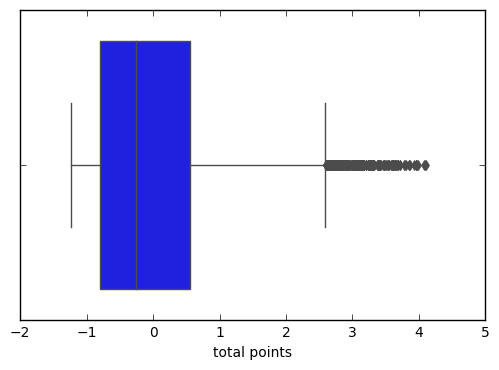

In [29]:
sns.boxplot(totpts_norm)
plt.xlabel("total points")
# plt.xlim(3, 4)
plt.show()

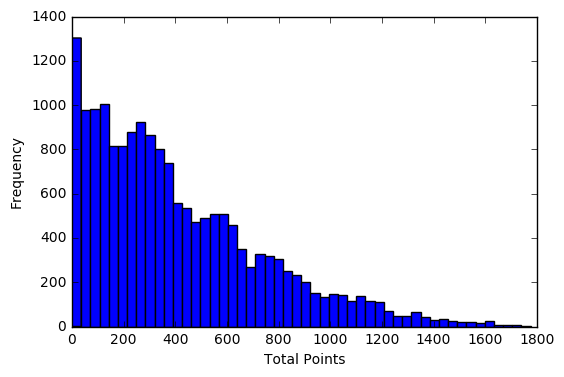

In [30]:
df['total_points'].plot(kind='hist', bins=50)
plt.xlabel("Total Points")

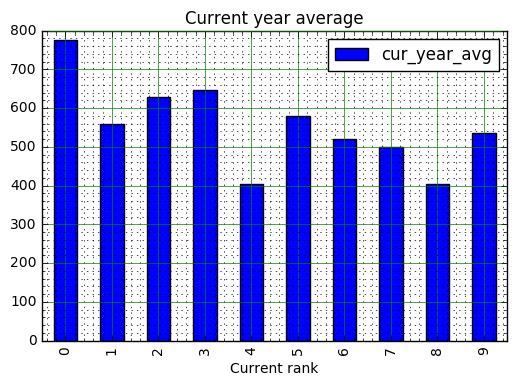

In [31]:
df[['cur_year_avg','country_abrv']][:10].plot(kind='bar', title='Current year average')
plt.xlabel('Current rank')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [32]:
# Hypothesis testing

df['last_avg_pred'] = 0
for index, row in df['last_year_avg'].iteritems():
    df['last_avg_pred'].loc[index] = (df['two_year_ago_avg'].loc[index] + df['cur_year_avg'].loc[index]) / 2

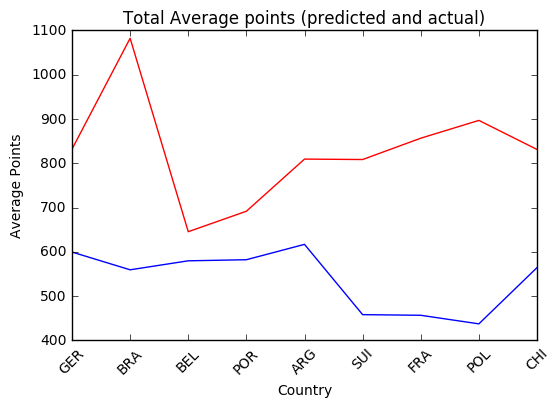

In [33]:
country_abrv = []
last_year_avg = []
last_avg_pred =[]
for index, value in df["country_abrv"][:9].items():
    country_abrv.append(value)
# print(country_abrv)
for index, value in df["last_year_avg"][:9].items():
    last_year_avg.append(value)
for index, value in df['last_avg_pred'][:9].items():
    last_avg_pred.append(value)
abrv = []
for i in range(1, 10):
    abrv.append(i)
plt.xticks(abrv, country_abrv)
plt.xticks(range(1, 10), country_abrv, rotation = 45)

plt.plot(abrv, last_year_avg, color='red')
plt.plot(abrv, last_avg_pred, color='blue')
plt.xlabel("Country")
plt.ylabel("Average Points")
plt.title("Total Average points (predicted and actual)")
plt.show()

In [34]:
df.drop(["cur_year_avg_weighted"], inplace=True, axis=1)
df.drop(["last_year_avg_weighted"], inplace=True, axis=1)
df.drop(["two_year_ago_weighted"], inplace=True, axis=1)
df.drop(["three_year_ago_weighted"], inplace=True, axis=1)
df.drop(["rank_date"], inplace=True, axis=1)

df.to_csv("cleaned1.csv", sep=",")

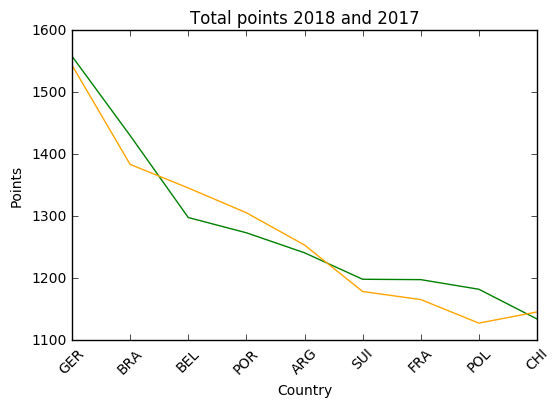

In [35]:
country_abrv = []
total_points = []
previous_points =[]
for index, value in df["country_abrv"][:9].items():
    country_abrv.append(value)
# print(country_abrv)
for index, value in df["total_points"][:9].items():
    total_points.append(value)
for index, value in df['previous_points'][:9].items():
    previous_points.append(value)
abrv = []
for i in range(1, 10):
    abrv.append(i)
plt.xticks(abrv, country_abrv)
plt.xticks(range(1, 10), country_abrv, rotation = 45)

plt.plot(abrv, total_points, color='g')
plt.plot(abrv, previous_points, color='orange')
plt.xlabel("Country")
plt.ylabel("Points")
plt.title("Total points 2018 and 2017")
plt.show()

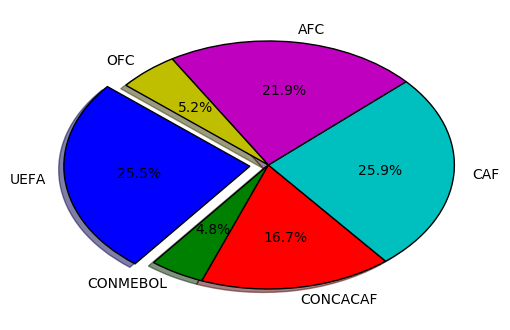

In [45]:
# Pie chart plot
cuefa = 0
cconmebol = 0
cconcacaf = 0
ccaf = 0
cafc = 0
cofc = 0
for index, value in df['confederation'].items():
    if value == 'UEFA':
        cuefa += 1
    elif value == 'CONMEBOL':
        cconmebol += 1
    elif value == 'CONCACAF':
        cconcacaf += 1
    elif value == 'CAF':
        ccaf += 1
    elif value == 'AFC':
        cafc += 1
    elif value == 'OFC':
        cofc += 1
explode = (0.1, 0.0, 0.0, 0.0, 0.0, 0.0)
sizes = [cuefa, cconmebol, cconcacaf, ccaf, cafc, cofc]
# print(sizes)
labels = ['UEFA', 'CONMEBOL', 'CONCACAF', 'CAF', 'AFC', 'OFC']
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()